# Introduction 
the dataset from kaggle from this link https://www.kaggle.com/datasets/artempozdniakov/ukrainian-market-mobile-phones-data?resource=download 

# Question 


1) what is the most expensive mobile sold?

2) which OS sold? 

3) what is the maximum price of the OS?

4) what is the 7 top expensive phones that has battery_size > 4500 what is the 7 top expensive phones that has battery_size > 4500?

5) How many phones that has more than 64 memory_size?

6) what is relation ship between phone_os versus the number of sellers by displaying min, max, mean, sum, std, count values?

7) The highest rate of survival of the phone for a longer period?

8) what is the max price for sellers_amount > 35 ? 

9) How much The companies earned from sell their brands and Highest earning company?
10) What is the max and min popularity for different os? 
11) How much phones was launched in each mm//yyyy and the maximum year that launched at?g 
12) Is there a correllation between all columns with highest_price of the brands ?

13) what is the popular brand and his best price?

14) How many phones that highest_price equal the minimum price?

15) what is the first and last version of brands are released?

16) Visualize all brands and their releases over the years?

17) what is the first and last phone and have the high sellers_amount ?

18) what is the highest year that released phones in it and how much phones?4


# Import Library


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the Data


In [4]:
df=pd.read_csv('phones_data.csv',index_col=0)
df

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,1101,22685.0,16018.0,27900.0,61,6.50,64.0,3174.0,9-2018
1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,530,24600.0,21939.0,33720.0,28,6.50,64.0,3174.0,9-2018
1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,1174,8804.0,7999.0,9999.0,18,6.26,128.0,3750.0,11-2019
1222,ZTE,nubia Red Magic 5G 8/128GB Black,Android,752,18755.0,18500.0,19010.0,2,6.65,128.0,4500.0,10-2020


# Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1224 entries, 0 to 1223
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      1224 non-null   object 
 1   model_name      1224 non-null   object 
 2   os              1027 non-null   object 
 3   popularity      1224 non-null   int64  
 4   best_price      1224 non-null   float64
 5   lowest_price    964 non-null    float64
 6   highest_price   964 non-null    float64
 7   sellers_amount  1224 non-null   int64  
 8   screen_size     1222 non-null   float64
 9   memory_size     1112 non-null   float64
 10  battery_size    1214 non-null   float64
 11  release_date    1224 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 124.3+ KB


# Data Cleaning

Remove Dublicates

In [11]:
df=df.drop_duplicates()

In [13]:
df

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,1101,22685.0,16018.0,27900.0,61,6.50,64.0,3174.0,9-2018
1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,530,24600.0,21939.0,33720.0,28,6.50,64.0,3174.0,9-2018
1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,1174,8804.0,7999.0,9999.0,18,6.26,128.0,3750.0,11-2019
1222,ZTE,nubia Red Magic 5G 8/128GB Black,Android,752,18755.0,18500.0,19010.0,2,6.65,128.0,4500.0,10-2020


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1224 entries, 0 to 1223
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      1224 non-null   object 
 1   model_name      1224 non-null   object 
 2   os              1027 non-null   object 
 3   popularity      1224 non-null   int64  
 4   best_price      1224 non-null   float64
 5   lowest_price    964 non-null    float64
 6   highest_price   964 non-null    float64
 7   sellers_amount  1224 non-null   int64  
 8   screen_size     1222 non-null   float64
 9   memory_size     1112 non-null   float64
 10  battery_size    1214 non-null   float64
 11  release_date    1224 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 124.3+ KB


#### Fix os

In [17]:
for os in df['os'].unique():
    print(os)

Android
nan
iOS
OxygenOS
WindowsPhone
EMUI
KAIOS


In [19]:
df[df['os'].isnull()].index

Index([  12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
       ...
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1223],
      dtype='int64', length=197)

In [20]:
df['os'] = df['os'].fillna('Unknown')

In [22]:
df.head(20)

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.000,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.000,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.000,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.000,2000.0,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.000,3000.0,4-2020
5,Honor,10 6/64GB Black,Android,71,10865.0,10631.0,11099.0,2,5.80,64.000,3400.0,6-2018
6,Honor,10 Lite 3/32GB Blue,Android,424,3999.0,NaN,NaN,2,6.21,32.000,3400.0,12-2018
7,Honor,10 Lite 4/64GB Black,Android,134,4973.0,4733.0,5295.0,6,6.21,64.000,3400.0,1-2019
8,Honor,10 lite 3/128GB Blue,Android,477,5100.0,4990.0,5222.0,3,6.21,128.000,3400.0,1-2021
9,Honor,10 lite 3/64GB Black,Android,215,4948.0,4646.0,5372.0,8,6.21,64.000,3400.0,12-2018


In [24]:
df.shape

(1224, 12)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1224 entries, 0 to 1223
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      1224 non-null   object 
 1   model_name      1224 non-null   object 
 2   os              1224 non-null   object 
 3   popularity      1224 non-null   int64  
 4   best_price      1224 non-null   float64
 5   lowest_price    964 non-null    float64
 6   highest_price   964 non-null    float64
 7   sellers_amount  1224 non-null   int64  
 8   screen_size     1222 non-null   float64
 9   memory_size     1112 non-null   float64
 10  battery_size    1214 non-null   float64
 11  release_date    1224 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 124.3+ KB


## Fix Lowest Price and highest Price

In [31]:
 (df.isna().sum()/df.shape[0])*100

brand_name         0.000000
model_name         0.000000
os                 0.000000
popularity         0.000000
best_price         0.000000
lowest_price      21.241830
highest_price     21.241830
sellers_amount     0.000000
screen_size        0.163399
memory_size        9.150327
battery_size       0.816993
release_date       0.000000
dtype: float64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1224 entries, 0 to 1223
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      1224 non-null   object 
 1   model_name      1224 non-null   object 
 2   os              1224 non-null   object 
 3   popularity      1224 non-null   int64  
 4   best_price      1224 non-null   float64
 5   lowest_price    964 non-null    float64
 6   highest_price   964 non-null    float64
 7   sellers_amount  1224 non-null   int64  
 8   screen_size     1222 non-null   float64
 9   memory_size     1112 non-null   float64
 10  battery_size    1214 non-null   float64
 11  release_date    1224 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 124.3+ KB


## Fix screen_size , battery_size and memory_size

In [36]:
df.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1224.000000,1224.000000,964.000000,964.000000,1224.000000,1222.000000,1112.000000,1214.000000
mean,612.500000,7941.206699,7716.018672,9883.410788,16.743464,5.394378,95.700059,3608.201812
std,353.482673,8891.836260,8560.959059,11514.936818,20.597006,1.476991,111.922576,1668.268774
min,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,306.750000,2599.750000,2399.000000,2887.000000,2.000000,5.162500,32.000000,2900.000000
50%,612.500000,4728.000000,4574.000000,5325.500000,8.000000,6.000000,64.000000,3687.000000
75%,918.250000,9323.000000,9262.250000,12673.750000,26.000000,6.400000,128.000000,4400.000000
max,1224.000000,56082.000000,49999.000000,69999.000000,125.000000,8.100000,1000.000000,18800.000000


## Outliers 
### fix best_price

In [38]:
Q1 = df['best_price'].quantile(0.25)
Q3 = df['best_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['best_price'] < lower_bound) | (df['best_price'] > upper_bound)].index

df.drop(df[(df['best_price'] < lower_bound) | (df['best_price'] > upper_bound)].index,axis=0,inplace=True)

In [41]:
df.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1090.000000,1090.000000,837.000000,837.000000,1090.000000,1089.000000,978.000000,1080.000000
mean,582.766055,5367.479817,4936.970131,6186.763441,14.454128,5.267429,71.847102,3581.575000
std,347.743680,4496.668718,4128.030345,5612.030069,17.618657,1.509291,69.107886,1746.564528
min,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,281.250000,2395.250000,2090.000000,2489.000000,2.000000,5.000000,32.000000,2760.000000
50%,571.500000,4100.500000,3947.000000,4516.000000,7.000000,5.800000,64.000000,3500.000000
75%,877.750000,6875.500000,6395.000000,7990.000000,22.000000,6.350000,128.000000,4400.000000
max,1223.000000,19369.000000,18750.000000,46617.000000,125.000000,7.120000,512.000000,18800.000000


### fix sellers_amount

In [44]:
Q1 = df['sellers_amount'].quantile(0.25)
Q3 = df['sellers_amount'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['sellers_amount'] < lower_bound) | (df['sellers_amount'] > upper_bound)].index

df.drop(df[(df['sellers_amount'] < lower_bound) | (df['sellers_amount'] > upper_bound)].index,axis=0,inplace=True)

In [46]:
df.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1047.000000,1047.000000,794.000000,794.000000,1047.000000,1046.000000,938.000000,1037.000000
mean,563.423114,5269.434575,4842.489924,6032.431990,12.159503,5.248518,70.970560,3563.030858
std,338.868068,4425.364830,4087.399266,5517.447502,13.257069,1.510897,69.215504,1755.625568
min,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,270.500000,2333.500000,2042.250000,2396.500000,2.000000,5.000000,32.000000,2730.000000
50%,550.000000,4090.000000,3773.500000,4472.500000,6.000000,5.760000,64.000000,3500.000000
75%,844.500000,6733.500000,6223.750000,7742.500000,20.000000,6.300000,128.000000,4380.000000
max,1223.000000,19369.000000,18750.000000,46617.000000,52.000000,7.120000,512.000000,18800.000000


### fix battery_size

In [48]:
Q1 = df['battery_size'].quantile(0.25)
Q3 = df['battery_size'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['battery_size'] < lower_bound) | (df['battery_size'] > upper_bound)].index

df.drop(df[(df['battery_size'] < lower_bound) | (df['battery_size'] > upper_bound)].index,axis=0,inplace=True)

In [51]:
df.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1023.000000,1023.000000,772.000000,772.000000,1023.000000,1022.000000,916.000000,1013.000000
mean,562.438905,5259.672532,4825.411917,6023.284974,12.211144,5.237065,70.718762,3397.791708
std,339.908713,4463.879959,4133.904082,5578.918521,13.347544,1.519155,69.835661,1357.837971
min,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,267.500000,2299.000000,1999.000000,2363.000000,2.000000,5.000000,32.000000,2700.000000
50%,549.000000,3999.000000,3685.000000,4399.000000,6.000000,5.715000,64.000000,3500.000000
75%,844.500000,6733.500000,6207.250000,7799.000000,20.000000,6.300000,128.000000,4300.000000
max,1223.000000,19369.000000,18750.000000,46617.000000,52.000000,7.120000,512.000000,6600.000000


### fix popularity

In [54]:
Q1 = df['popularity'].quantile(0.25)
Q3 = df['popularity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['popularity'] < lower_bound) | (df['popularity'] > upper_bound)].index

df.drop(df[(df['popularity'] < lower_bound) | (df['popularity'] > upper_bound)].index,axis=0,inplace=True)

In [56]:
df.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1023.000000,1023.000000,772.000000,772.000000,1023.000000,1022.000000,916.000000,1013.000000
mean,562.438905,5259.672532,4825.411917,6023.284974,12.211144,5.237065,70.718762,3397.791708
std,339.908713,4463.879959,4133.904082,5578.918521,13.347544,1.519155,69.835661,1357.837971
min,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,267.500000,2299.000000,1999.000000,2363.000000,2.000000,5.000000,32.000000,2700.000000
50%,549.000000,3999.000000,3685.000000,4399.000000,6.000000,5.715000,64.000000,3500.000000
75%,844.500000,6733.500000,6207.250000,7799.000000,20.000000,6.300000,128.000000,4300.000000
max,1223.000000,19369.000000,18750.000000,46617.000000,52.000000,7.120000,512.000000,6600.000000


### fix memory_size

In [59]:
Q1 = df['memory_size'].quantile(0.25)
Q3 = df['memory_size'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['memory_size'] < lower_bound) | (df['memory_size'] > upper_bound)].index

df.drop(df[(df['memory_size'] < lower_bound) | (df['memory_size'] > upper_bound)].index,axis=0,inplace=True)

In [61]:
df.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1015.000000,1015.000000,769.000000,769.000000,1015.000000,1014.000000,908.000000,1005.000000
mean,563.197044,5162.005911,4784.080624,5941.275683,12.256158,5.229073,66.830821,3392.998010
std,339.977727,4342.534253,4088.443076,5417.804326,13.375380,1.522365,56.456503,1362.168235
min,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,268.500000,2299.000000,1999.000000,2363.000000,2.000000,5.000000,32.000000,2700.000000
50%,550.000000,3962.000000,3680.000000,4399.000000,6.000000,5.710000,64.000000,3500.000000
75%,846.500000,6673.500000,6195.000000,7600.000000,20.000000,6.300000,128.000000,4300.000000
max,1223.000000,19369.000000,18750.000000,46617.000000,52.000000,7.120000,256.000000,6600.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1015 entries, 0 to 1222
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      1015 non-null   object 
 1   model_name      1015 non-null   object 
 2   os              1015 non-null   object 
 3   popularity      1015 non-null   int64  
 4   best_price      1015 non-null   float64
 5   lowest_price    769 non-null    float64
 6   highest_price   769 non-null    float64
 7   sellers_amount  1015 non-null   int64  
 8   screen_size     1014 non-null   float64
 9   memory_size     908 non-null    float64
 10  battery_size    1005 non-null   float64
 11  release_date    1015 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 103.1+ KB


### fix nulls

In [66]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df['screen_size']=imputer.fit_transform(df[['screen_size']])
df['battery_size']=imputer.fit_transform(df[['battery_size']])
df['memory_size']=imputer.fit_transform(df[['memory_size']])
df['lowest_price']=imputer.fit_transform(df[['lowest_price']])
df['highest_price']=imputer.fit_transform(df[['highest_price']])

In [68]:
df.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,563.197044,5162.005911,4784.080624,5941.275683,12.256158,5.229073,66.830821,3392.998010
std,339.977727,4342.534253,3558.111782,4715.035296,13.375380,1.521614,53.394760,1355.434787
min,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,268.500000,2299.000000,2695.000000,3182.000000,2.000000,5.000000,32.000000,2700.000000
50%,550.000000,3962.000000,4784.080624,5941.275683,6.000000,5.710000,64.000000,3450.000000
75%,846.500000,6673.500000,5257.500000,5999.000000,20.000000,6.300000,128.000000,4300.000000
max,1223.000000,19369.000000,18750.000000,46617.000000,52.000000,7.120000,256.000000,6600.000000


## Outlier

In [76]:
!pip install datasist

  Using cached datasist-1.5.3-py3-none-any.whl.metadata (3.8 kB)
Using cached datasist-1.5.3-py3-none-any.whl (33 kB)


In [70]:
from  datasist.structdata import detect_outliers

<Axes: xlabel='best_price'>

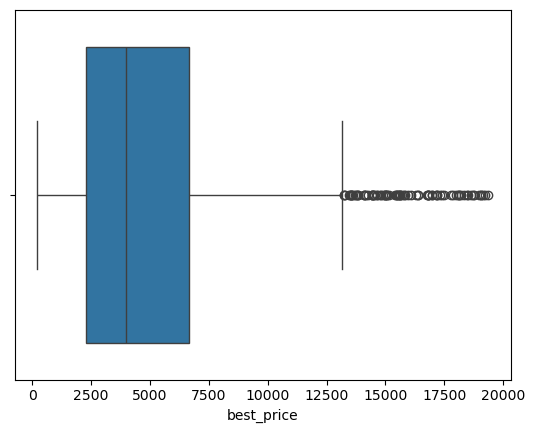

In [72]:
sns.boxplot(x='best_price',data=df)

In [74]:
idx=detect_outliers(df,0,['popularity','best_price','sellers_amount','screen_size','memory_size','battery_size'])

In [76]:
idx

[97,
 104,
 107,
 110,
 114,
 123,
 124,
 195,
 254,
 255,
 256,
 257,
 331,
 374,
 375,
 430,
 458,
 459,
 460,
 476,
 477,
 480,
 481,
 491,
 495,
 497,
 498,
 501,
 526,
 527,
 528,
 529,
 530,
 531,
 532,
 535,
 536,
 537,
 538,
 539,
 540,
 596,
 597,
 598,
 599,
 606,
 609,
 610,
 698,
 699,
 702,
 703,
 704,
 705,
 706,
 724,
 730,
 732,
 733,
 754,
 755,
 812,
 876,
 884,
 943,
 1005,
 1006,
 1008,
 1009,
 1010,
 1011,
 1037,
 1042,
 1184,
 1185,
 1188,
 1189,
 1191,
 1192,
 1193,
 1197,
 1199,
 1201,
 1205,
 1206,
 1211,
 1222,
 28,
 213,
 259,
 382,
 605,
 751,
 839,
 909,
 910,
 962,
 965,
 999,
 1190,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 26,
 27,
 37,
 38,
 39,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 64,
 65,
 83,
 115,
 116,
 135,
 136,
 137,
 141,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 185,
 186,
 199,
 207,
 210,
 211,
 212,
 218,
 302,
 303,
 304,
 305,
 306,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 332,
 333,


In [78]:
outliers=df.loc[idx]
clean=df.drop(idx,axis=0)

In [80]:
outliers

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
97,OnePlus,6T 8/256GB Midnight Black,Android,661,15625.0,15080.000000,16213.000000,8,6.41,256.000000,3700.0,10-2018
104,OnePlus,7 8/256GB Mirror Gray,Android,1022,14443.0,13920.000000,15449.000000,11,6.41,256.000000,3700.0,7-2019
107,OnePlus,8 12/256GB Onyx Black,Android,1067,17172.0,16500.000000,18497.000000,11,6.55,256.000000,4300.0,4-2020
110,OnePlus,8 8/128GB Onyx Black,Android,1155,15840.0,14863.000000,16999.000000,13,6.55,128.000000,4300.0,4-2020
114,Nokia,8.3 5G 8/128GB Polar Night,Android,1055,19041.0,18500.000000,20517.000000,18,6.81,128.000000,4500.0,10-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1114,Nomi,i283 Red,Unknown,50,999.0,4784.080624,5941.275683,1,2.80,0.032000,1000.0,10-2018
1115,Nomi,i284 Black,Unknown,702,584.0,504.000000,763.000000,35,2.80,66.830821,1750.0,1-2020
1116,Nomi,i284 Red,Unknown,140,574.0,529.000000,695.000000,32,2.80,66.830821,1750.0,1-2020
1117,Nomi,i284 Violet-blue,Unknown,613,580.0,528.000000,709.000000,34,2.80,66.830821,1750.0,1-2020


In [81]:
df.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.000000,1819.000000,36,5.00,8.0,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.000000,2489.000000,36,5.00,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.000000,2489.000000,36,5.00,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.000000,2489.000000,36,5.00,16.0,2000.0,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,4784.080624,5941.275683,10,5.71,16.0,3000.0,4-2020


# Question 


## 1) what is the most expensive mobile sold

In [86]:
df[df['highest_price']==df['highest_price'].max()]

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
665,OnePlus,Nord N10 5G 6/128GB Midnight Ice,Android,1194,9795.0,7900.0,46617.0,28,6.49,128.0,4300.0,12-2020


## 2) which OS sold


In [89]:
df['brand_name'].value_counts()

brand_name
Xiaomi          104
Samsung          95
Motorola         60
Sigma mobile     47
Nokia            46
               ... 
BlackBerry        1
myPhone           1
Prestigio         1
NUU               1
KENEKSI           1
Name: count, Length: 61, dtype: int64

<Axes: xlabel='count', ylabel='brand_name'>

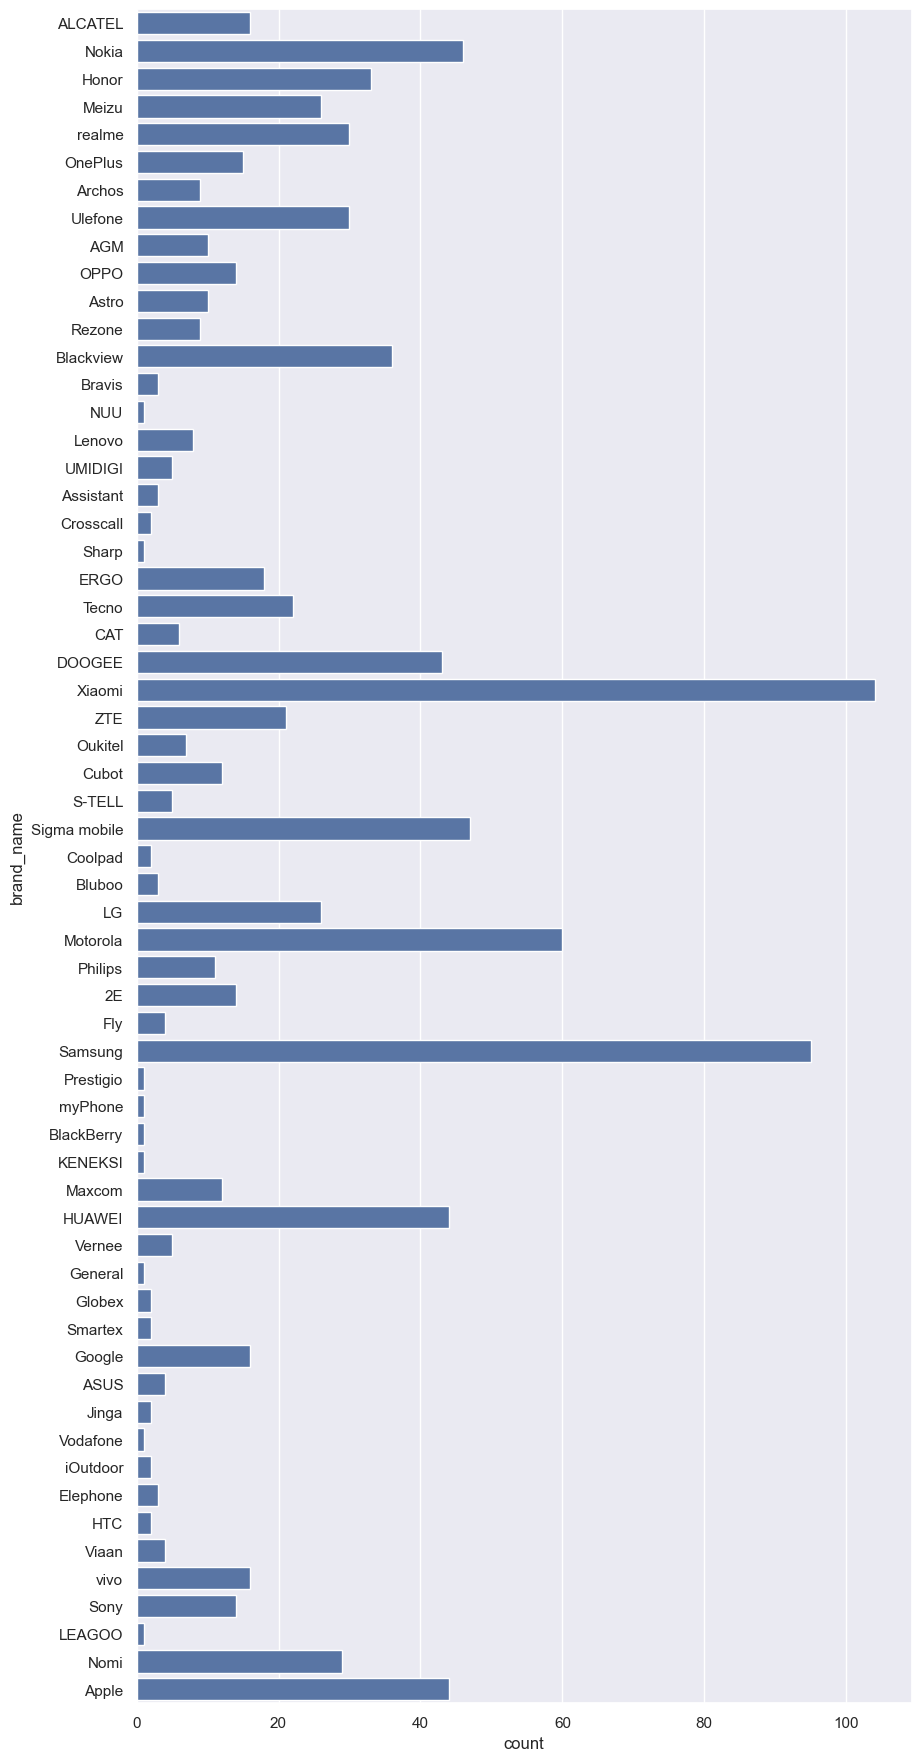

In [90]:
sns.set(rc={'figure.figsize':[10,22]},font_scale=1)
sns.countplot(y='brand_name',data=df)

## 3) what is the maximum price of the OS


In [93]:
df.groupby('os').max()['highest_price']

os
Android         46617.000000
KAIOS            1059.000000
OxygenOS         9399.000000
Unknown          5941.275683
WindowsPhone     5941.275683
iOS             23928.000000
Name: highest_price, dtype: float64

<Axes: xlabel='os', ylabel='highest_price'>

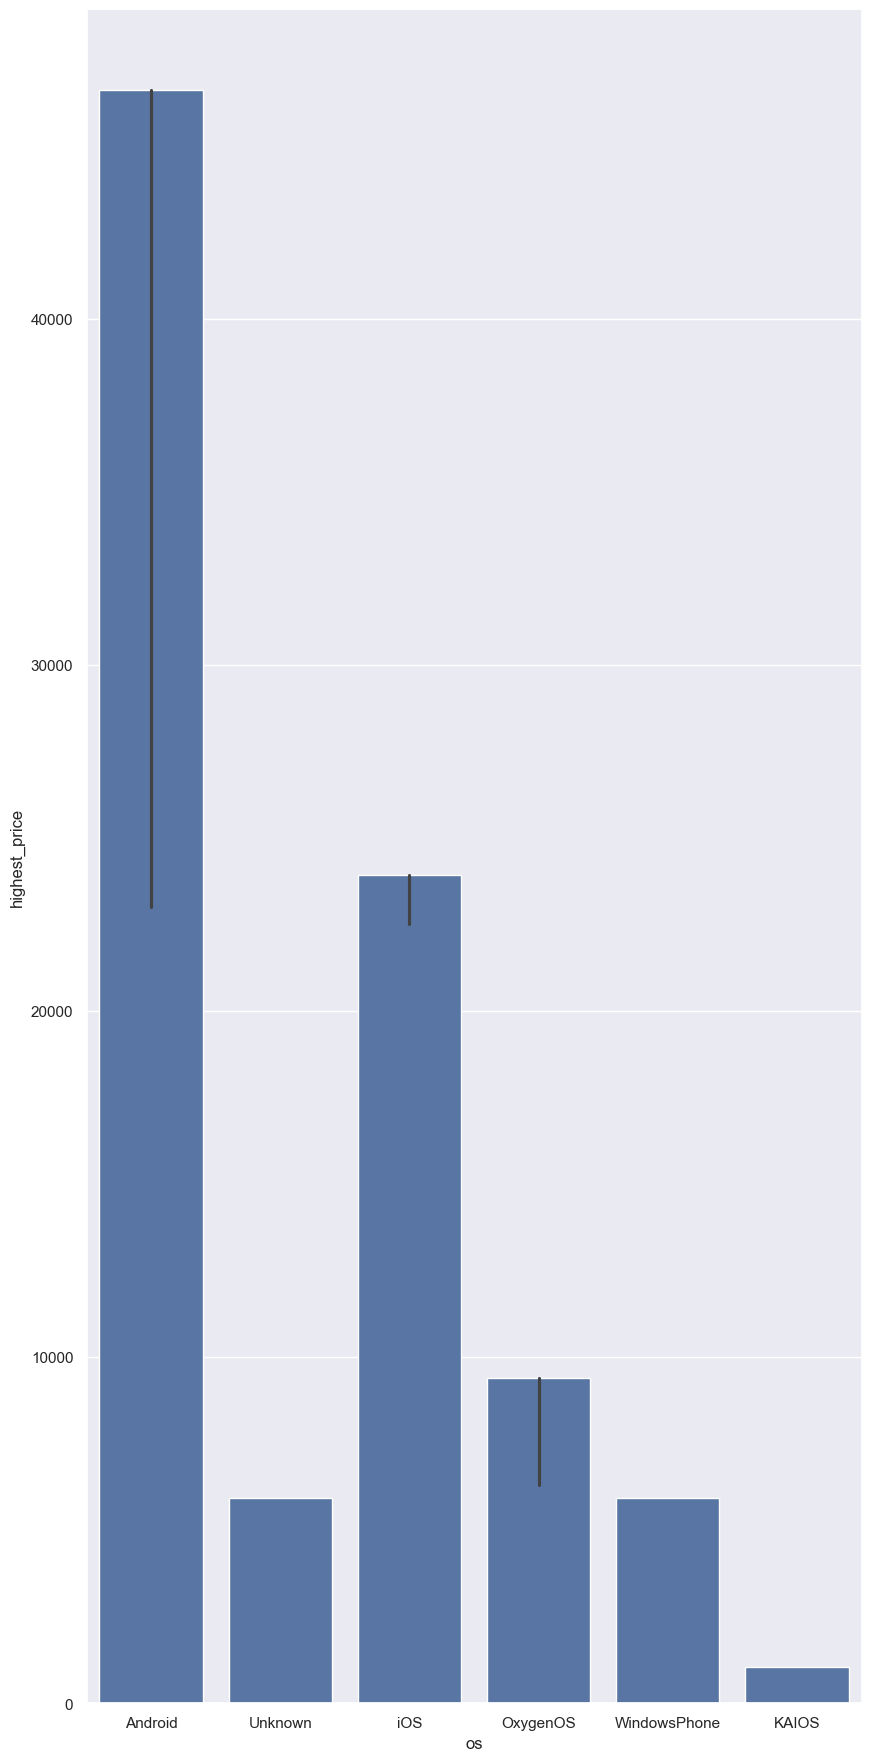

In [94]:
sns.barplot(x='os',y='highest_price',data=df,estimator=np.max)

## 4) what is the 7 top expensive phones that has battery_size > 4500

In [96]:
df[df['battery_size']>4500].sort_values(by='highest_price',ascending=False).head(7)

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
755,ASUS,ROG Phone 3 ZS661KS 12/128GB Black (90AI0032-M...,Android,1140,18993.0,17589.0,20634.0,7,6.59,128.0,6000.0,9-2020
754,ASUS,ROG Phone 3 Strix 12/128GB Black (90AI0031-M00...,Android,973,18618.0,17970.0,19999.0,5,6.59,128.0,6000.0,9-2020
256,Xiaomi,Black Shark 3 12/256GB Black,Android,726,18319.0,17400.0,18999.0,4,6.67,256.0,4720.0,7-2020
610,Xiaomi,Mi 10T Pro 8/256GB Cosmic Black,Android,1168,16756.0,15999.0,17538.0,12,6.67,256.0,5000.0,10-2020
609,Xiaomi,Mi 10T Pro 8/128GB Cosmic Black,Android,1152,15767.0,14999.0,16720.0,17,6.67,128.0,5000.0,10-2020
195,Ulefone,Armor 9 8/128GB Black (6937748733515),Android,1009,15611.0,13799.0,16120.0,20,6.30,128.0,6600.0,8-2020
257,Xiaomi,Black Shark 3 8/128GB Black,Android,1098,13846.0,13151.0,14999.0,31,6.67,128.0,4720.0,6-2020


### 5) How many phones that has more than 64 memory_size 


In [98]:
df[df['memory_size']>64].sort_values(by='memory_size', ascending=False)

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
104,OnePlus,7 8/256GB Mirror Gray,Android,1022,14443.0,13920.000000,15449.000000,11,6.41,256.000000,3700.0,7-2019
940,LG,V50S ThinQ 5G 8/256GB Aurora Black,Android,1100,10499.0,9999.000000,10999.000000,2,6.40,256.000000,4000.0,5-2020
704,HUAWEI,P30 Pro 8/256GB Black (51093NFN),Android,1089,15560.0,4784.080624,5941.275683,1,6.47,256.000000,4200.0,3-2019
597,HUAWEI,Mate 10 6/256GB Porsche Design,Android,606,14257.0,13255.000000,15675.000000,4,6.00,256.000000,4000.0,3-2018
599,HUAWEI,Mate RS Porsche Design 6/256GB Black,Android,785,13782.0,13499.000000,13999.000000,3,6.00,256.000000,4000.0,12-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
922,Tecno,T454 Champagne Gold (4895180745980),Unknown,428,536.0,449.000000,649.000000,30,2.80,66.830821,1500.0,12-2020
921,Tecno,T372 TripleSIM Black (4895180746833),Unknown,949,366.0,325.000000,410.000000,17,2.40,66.830821,1150.0,12-2019
920,Tecno,T301 Black (4895180743320),Unknown,707,294.0,260.000000,344.000000,41,1.77,66.830821,1150.0,12-2019
595,Maxcom,MM817 Black,Unknown,404,747.0,699.000000,795.000000,13,2.40,66.830821,800.0,6-2020


## 6)what is relation ship between phone_os versus the number of sellers by displaying min, max, mean, sum, std, count values?

In [105]:
pvt=df.pivot_table(index='os',values='sellers_amount',aggfunc=['min','mean','max','sum','std','count'])

In [107]:
pvt

,min,mean,max,sum,std,count
,sellers_amount,sellers_amount,sellers_amount,sellers_amount,sellers_amount,sellers_amount
os,,,,,,
Android,1,10.248062,51,7932,12.291857,774
KAIOS,42,42.000000,42,42,NaN,1
OxygenOS,9,9.333333,10,28,0.577350,3
Unknown,1,19.708995,52,3725,14.401351,189
WindowsPhone,1,1.000000,1,3,0.000000,3
iOS,1,15.777778,48,710,15.191039,45


### 7) The highest rate of survival of the phone for a longer period


In [109]:
df[df['battery_size']==df['battery_size'].max()]

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
195,Ulefone,Armor 9 8/128GB Black (6937748733515),Android,1009,15611.0,13799.0,16120.0,20,6.3,128.0,6600.0,8-2020
196,Ulefone,Armor 9E 8/128GB Black (6937748733805),Android,816,11062.0,9610.0,13092.0,17,6.3,128.0,6600.0,9-2020
197,Ulefone,Armor 9E 8/128GB Black (6937748733805),Android,818,11062.0,9610.0,13092.0,17,6.3,128.0,6600.0,9-2020


### 8) what is the max price for sellers_amount > 35 ?

In [111]:
df[df['sellers_amount']>35]['highest_price'].max()

23928.0

### 9) How much The companies earned from sell their brands and Highest earning company?

In [113]:
brand_earnings = df.groupby("brand_name")["highest_price"].sum()

hec = brand_earnings.idxmax()
hea = brand_earnings.max()
print(hec,hea)

Samsung 853857.0650195058


###  10) What is the max and min popularity for different os

In [117]:
df.groupby('os').describe()['popularity']

,count,mean,std,min,25%,50%,75%,max
os,,,,,,,,
Android,774.0,593.720930,347.492418,2.0,282.0,602.5,890.75,1223.0
KAIOS,1.0,832.000000,NaN,832.0,832.0,832.0,832.00,832.0
OxygenOS,3.0,448.000000,410.303546,188.0,211.5,235.0,578.00,921.0
Unknown,189.0,402.571429,255.656105,1.0,208.0,390.0,551.00,1084.0
WindowsPhone,3.0,197.000000,18.083141,178.0,188.5,199.0,206.50,214.0
iOS,45.0,738.933333,291.388869,8.0,589.0,768.0,911.00,1212.0


In [119]:
df.groupby('os').min()['popularity']

os
Android           2
KAIOS           832
OxygenOS        188
Unknown           1
WindowsPhone    178
iOS               8
Name: popularity, dtype: int64

In [121]:
df.groupby('os').max()['popularity']

os
Android         1223
KAIOS            832
OxygenOS         921
Unknown         1084
WindowsPhone     214
iOS             1212
Name: popularity, dtype: int64

### 11) How much phones was launched in each mm-yyyy and the maximum year that launched at?

In [126]:
df['release_date'].value_counts()

release_date
10-2020    51
11-2019    40
7-2020     38
8-2020     37
9-2020     36
           ..
1-2015      1
12-2016     1
2-2021      1
5-2014      1
4-2014      1
Name: count, Length: 73, dtype: int64

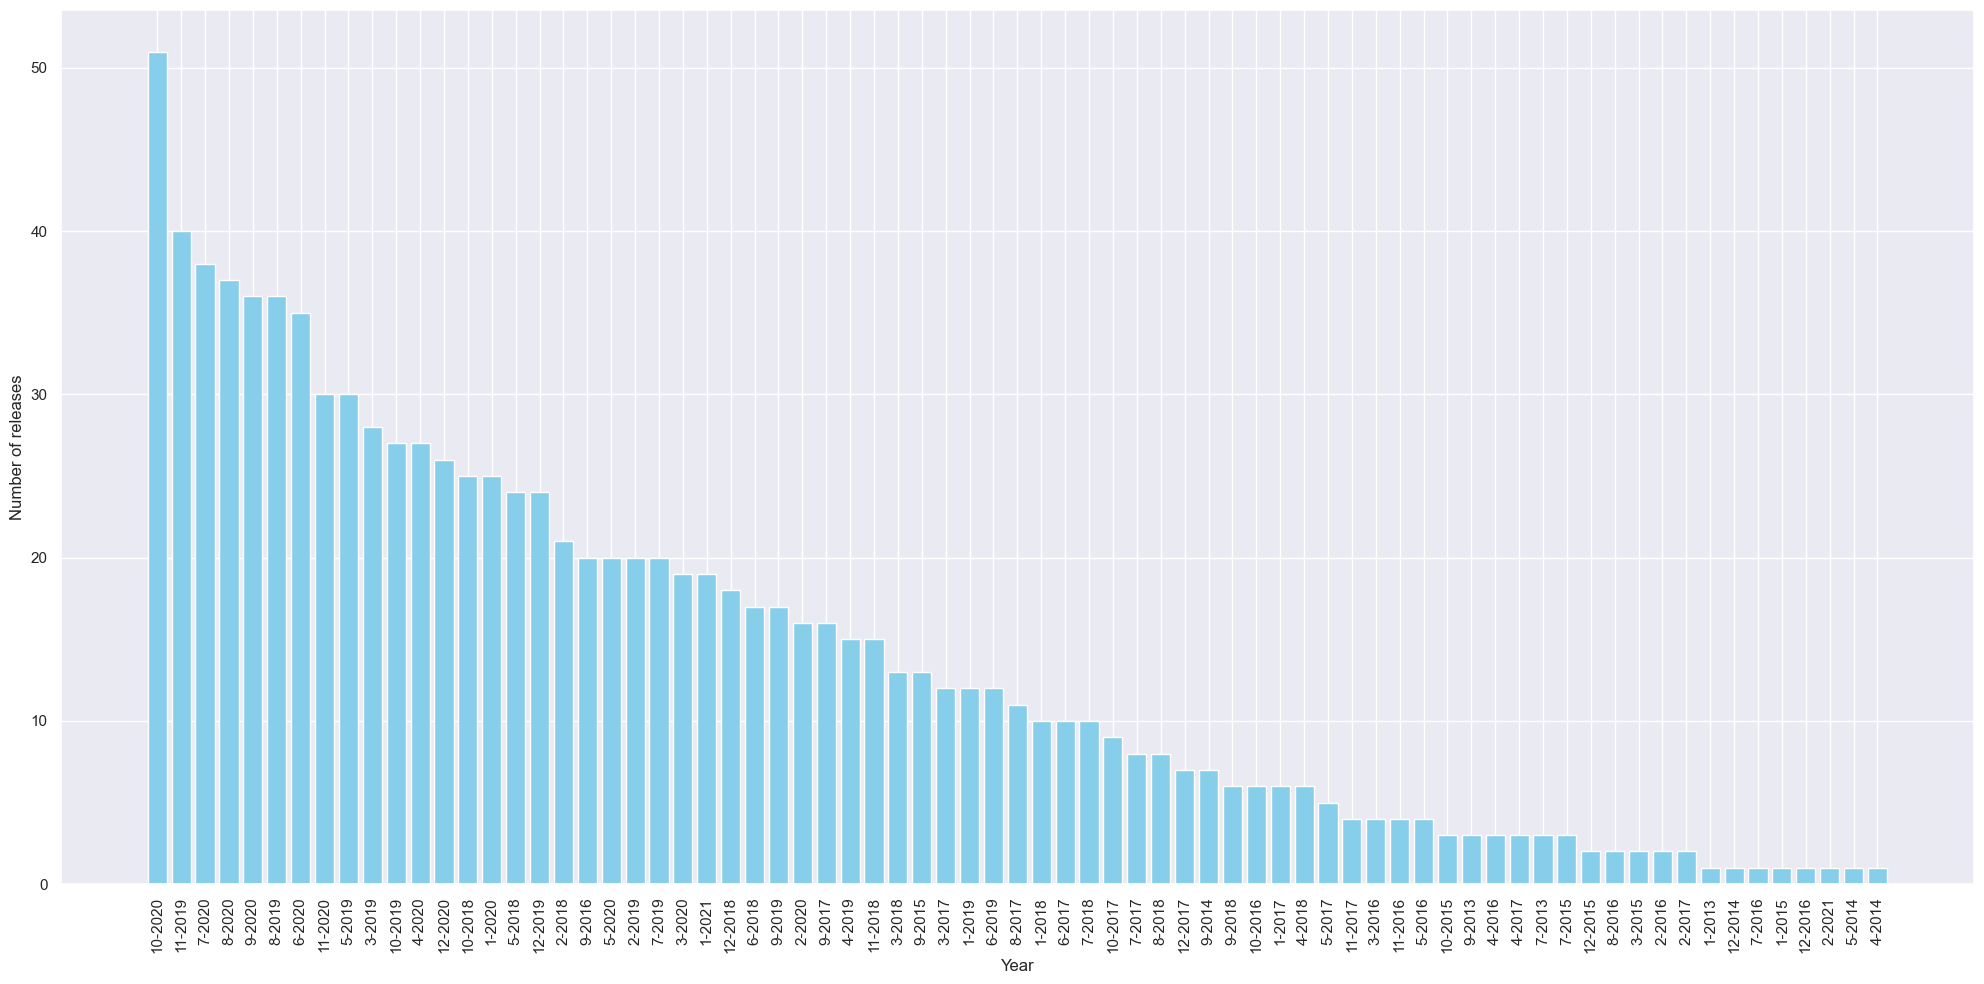

the max year is 10-2020  and the Value is 51


In [128]:
rd = df["release_date"].value_counts()

# Create the bar plot
plt.figure(figsize=(20, 10))
plt.bar(rd.index, rd.values, color="skyblue")
plt.xlabel('Year')
plt.ylabel('Number of releases')
plt.xticks(rotation=90)
# Show the plot
plt.tight_layout()
plt.show()
print("the max year is",rd.idxmax()," and the Value is",rd.max())

### 12) Is there a correllation between all columns with highest_price of the brands ?



In [130]:
df_encoded= df.select_dtypes(include=["number"])
df_encoded=df_encoded.corr()

<Axes: >

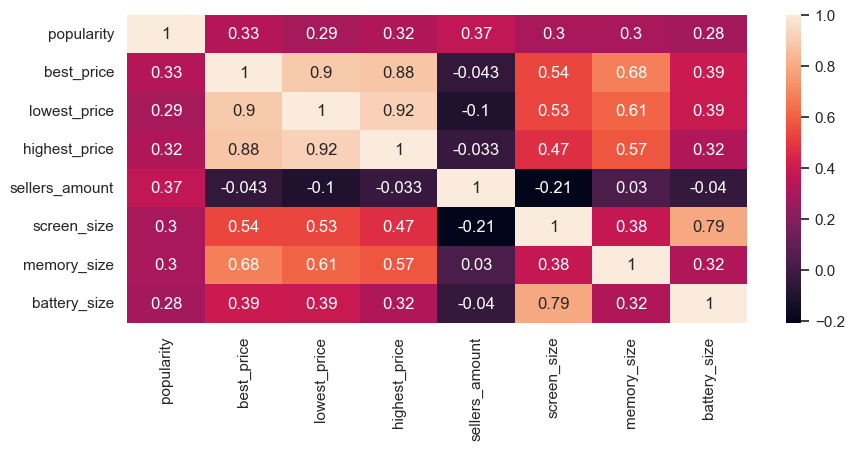

In [131]:
plt.figure(figsize=(10, 4))
sns.heatmap(df_encoded, annot=True)

### 13) what is the popular brand and his best price? 

In [136]:
temp=df[df['popularity']==df['popularity'].max()]
brand_earnings = df.groupby("best_price")["popularity"].max()


In [138]:
temp

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
734,Google,Pixel 4a 6/128GB Just Black,Android,1223,12106.0,11740.0,12999.0,37,5.81,128.0,3140.0,8-2020


In [140]:
hec = brand_earnings.idxmax()
hea = brand_earnings.max()
print(f"the best price is {hec} and the popularity is {hea}")

the best price is 12106.0 and the popularity is 1223


### 14) How many phones that highest_price equal the minimum highest price? 

In [143]:
df[df['highest_price']==df['highest_price'].min()]

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
141,Astro,A144 Black/Red,Unknown,519,214.0,199.0,229.0,2,1.77,0.032000,600.0,9-2019
1093,Nomi,i144m Black,Unknown,492,220.0,209.0,229.0,4,1.44,66.830821,600.0,9-2020


### 15) what is the first and last version of brands are released?

In [146]:
temp=df.groupby('brand_name').min()['release_date']

result_df = temp.reset_index()

result_df

,brand_name,release_date
0,2E,10-2017
1,AGM,10-2017
2,ALCATEL,10-2020
3,ASUS,3-2018
4,Apple,10-2019
...,...,...
56,ZTE,1-2018
57,iOutdoor,4-2020
58,myPhone,1-2017
59,realme,1-2020


In [148]:
temp1=df.groupby('brand_name').max()['release_date']

result_df1 = temp1.reset_index()

result_df1

,brand_name,release_date
0,2E,9-2018
1,AGM,9-2019
2,ALCATEL,9-2020
3,ASUS,9-2020
4,Apple,9-2017
...,...,...
56,ZTE,9-2020
57,iOutdoor,4-2020
58,myPhone,1-2017
59,realme,7-2020


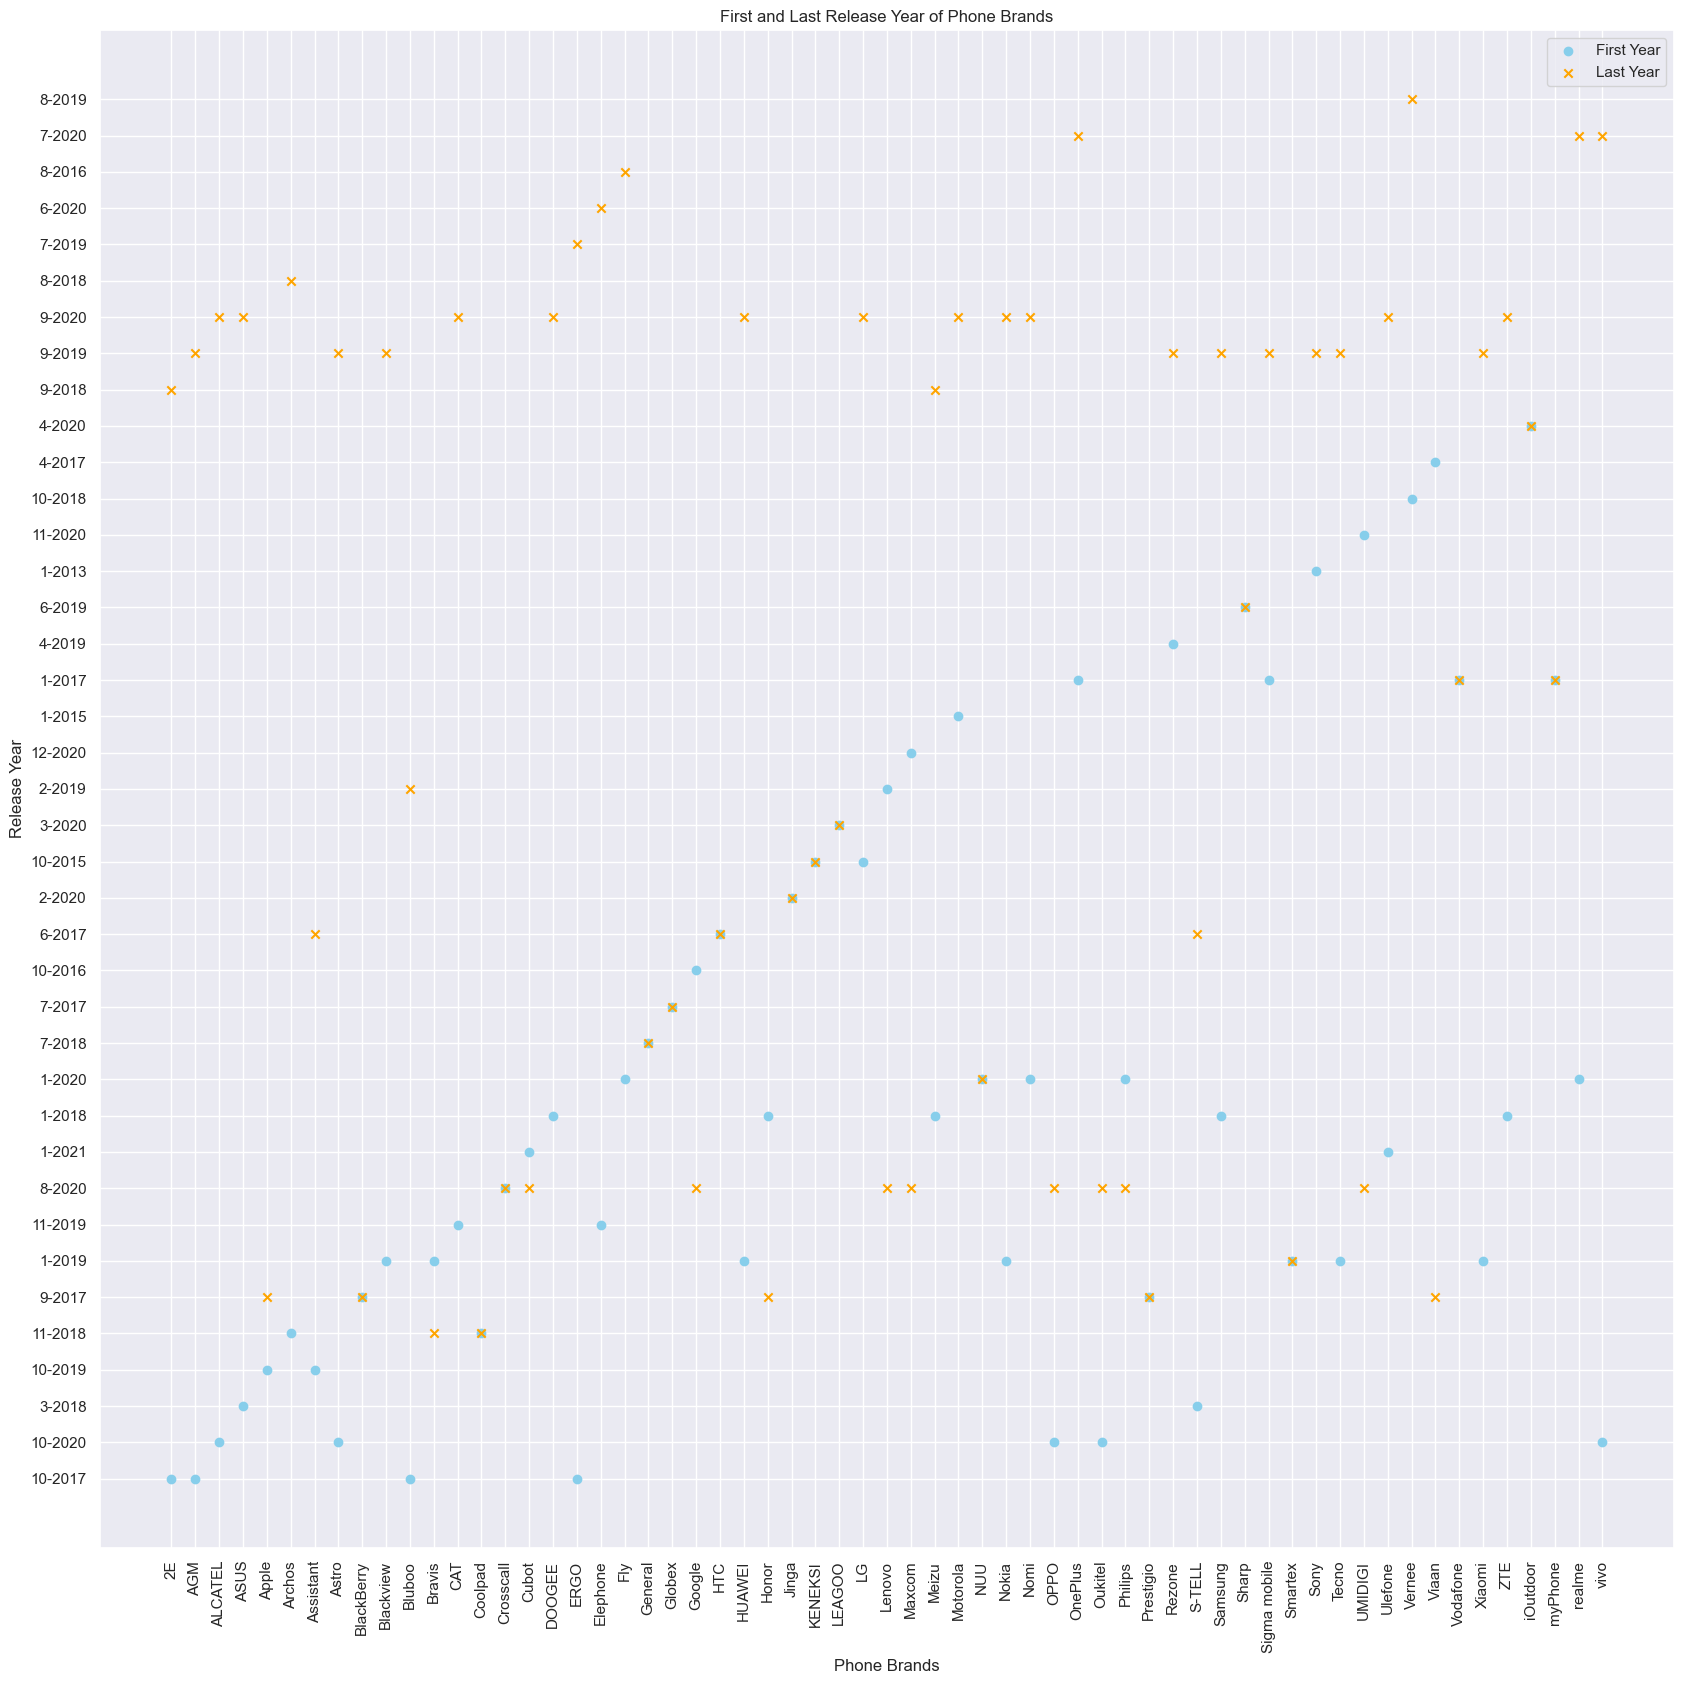

In [150]:

plt.figure(figsize=(17, 17))  

plt.scatter(result_df['brand_name'],result_df['release_date'], color='skyblue', label='First Year', marker='o')
plt.scatter(result_df1['brand_name'],result_df1['release_date'], color='orange', label='Last Year', marker='x')

plt.xlabel('Phone Brands')
plt.ylabel('Release Year')
plt.title('First and Last Release Year of Phone Brands')

plt.xticks(rotation=90)  
plt.legend()  

plt.grid(True)  

plt.tight_layout()
plt.show()

### 16) Visualize all brands and their releases over the years

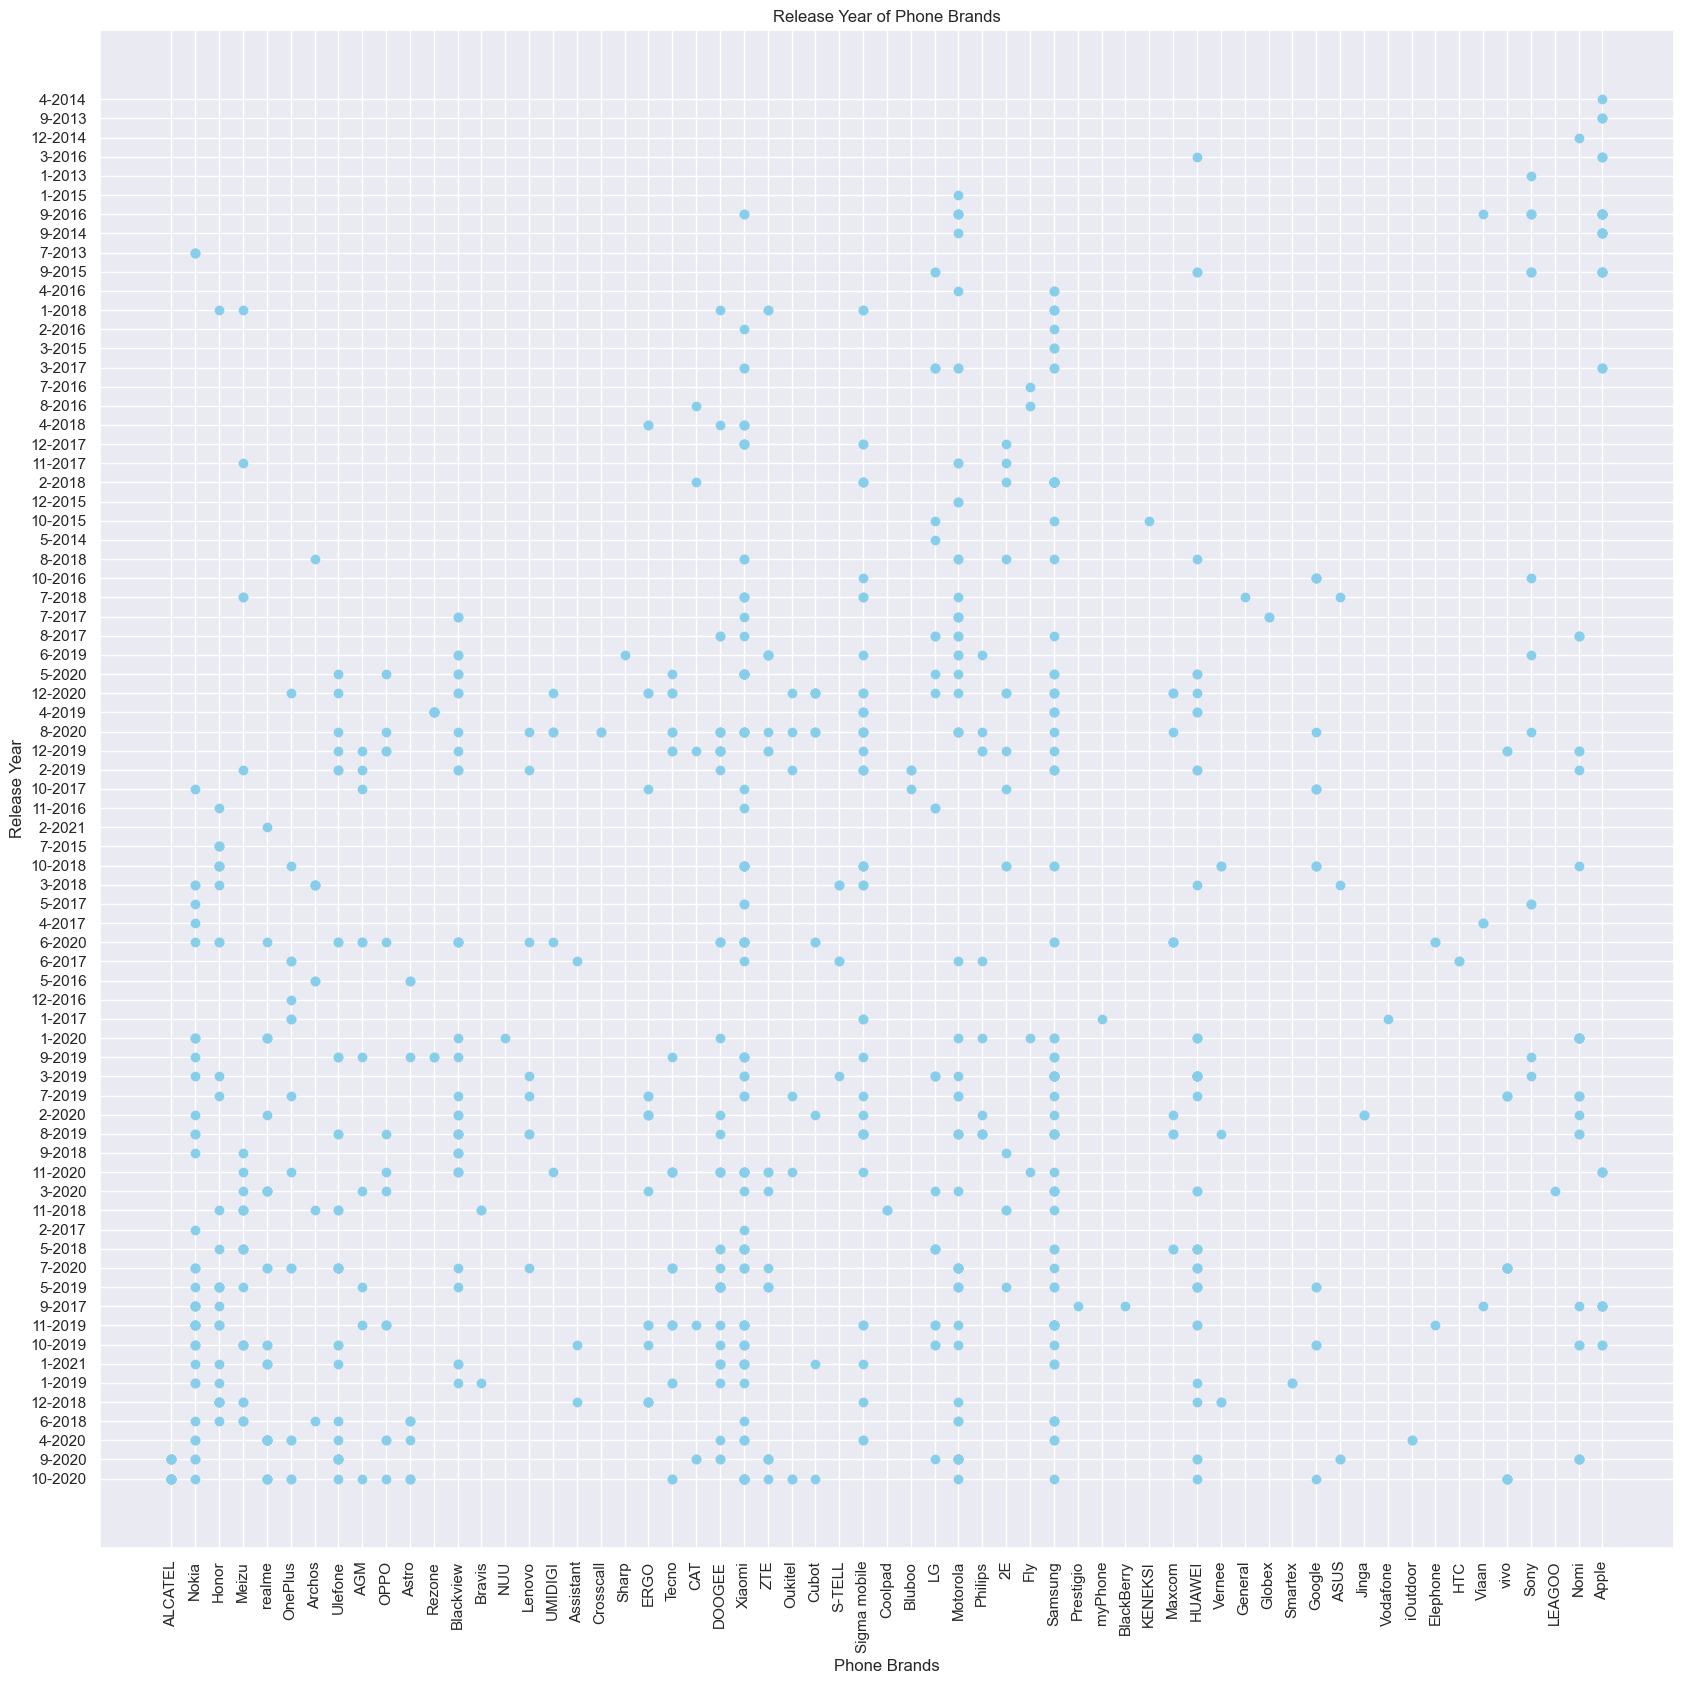

In [152]:
plt.figure(figsize=(17, 17))  # Adjust figure size as needed

plt.scatter(df['brand_name'], df['release_date'], color='skyblue', marker='o')

plt.xlabel('Phone Brands')
plt.ylabel('Release Year')
plt.title('Release Year of Phone Brands')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.grid(True)  # Add grid for better visualization

plt.tight_layout()
plt.show()

### 17) what is the first and last phone and have the high sellers_amount ?

In [156]:
df[df['release_date']==df['release_date'].min()].sort_values(by='sellers_amount',ascending=False)

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
1050,Sony,Xperia Z (Black),Android,505,2070.0,4784.080624,5941.275683,1,5.0,16.0,2330.0,1-2013


### 18) what is the highest year that released phones in it and how much phones?

In [159]:
temp=df['release_date'].value_counts()

In [161]:
temp

release_date
10-2020    51
11-2019    40
7-2020     38
8-2020     37
9-2020     36
           ..
1-2015      1
12-2016     1
2-2021      1
5-2014      1
4-2014      1
Name: count, Length: 73, dtype: int64

In [164]:
df_encoded= df.select_dtypes(include=["number"])
x = df_encoded.drop(["lowest_price"],axis=1)
y = df_encoded["lowest_price"]

In [166]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [168]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

<Axes: xlabel='highest_price', ylabel='lowest_price'>

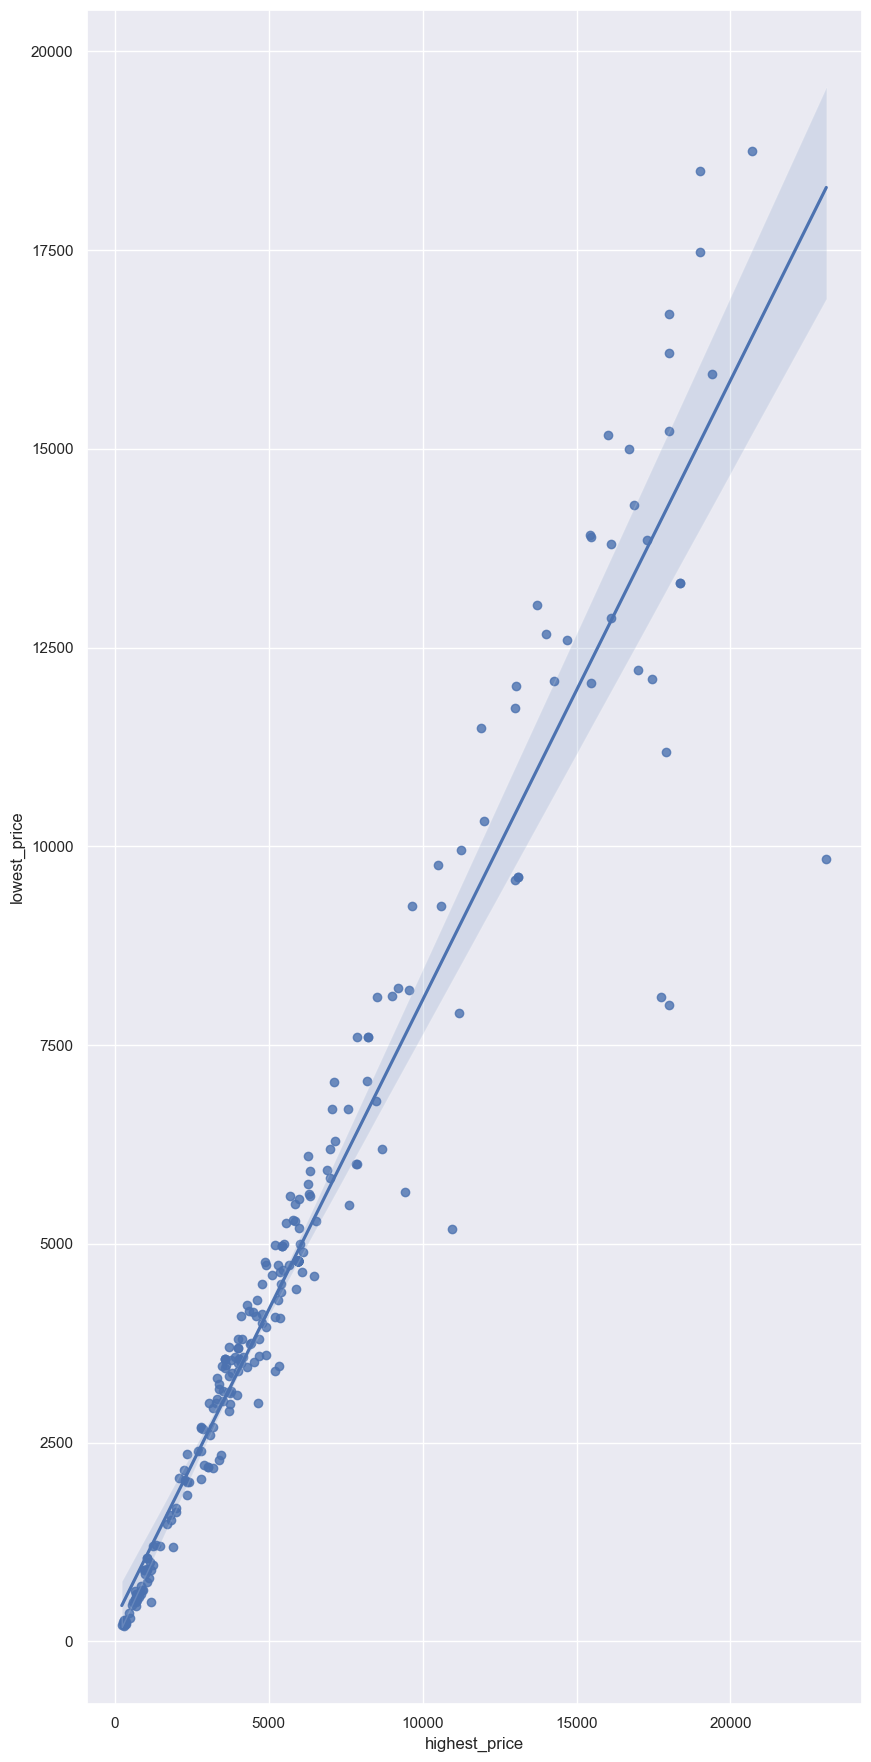

In [170]:
sns.regplot(data=df_encoded.sample(280), x="highest_price", y="lowest_price")

In [178]:
print(x.shape)
print("---")
print(y.shape)

(1015, 7)
---
(1015, 1)


In [180]:
reg.score(x_test,y_test)

0.9169424971360249